## Practice: Train CNN for MNIST dataset.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


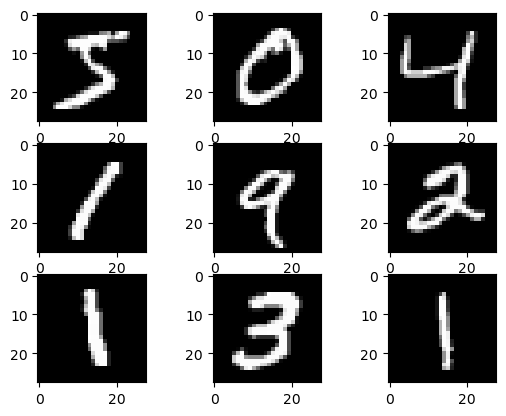

In [29]:
# Example of loading the mnist dataset
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()


# Preprocessing the data

# Reshape dataset to have single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

# Convert from integers to floats
train_X = train_X.astype('float32') 
test_X = test_X.astype('float32')

# Normalize the pixel values in the range [0,1]
train_X = train_X/255.0
test_X = test_X/255.0

# One hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Define the model 
model = Sequential()
# First convolutional layer with 32 filters of size 3x3 and RELU activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 2D Max pooling layer with a pool size of 2x2
model.add(MaxPooling2D((2, 2)))
# Second convolutional layer with 64 filters of size 3x3 and RELU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))
# Antoher 2D Max pooling layer with a pool size of 2x2
model.add(MaxPooling2D((2, 2)))
# Third convolutional layer with 64 filters of size 3x3 and ReLU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))
# Flattening the output of previous layer into a 1D vector
model.add(Flatten())
# Adding a hidden neural network layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))
# Adding the final fully connected neural network layer with 10 neurons (one for each digit class in the MNIST dataset)
# and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(test_X, test_y))


Epoch 1/10
938/938 [==============================] - 39s 38ms/step - loss: 0.1757 - accuracy: 0.9463 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 3/10
938/938 [==============================] - 37s 40ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0365 - val_accuracy: 0.9878
Epoch 4/10
938/938 [==============================] - 37s 39ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0310 - val_accuracy: 0.9905
Epoch 5/10
938/938 [==============================] - 37s 39ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0332 - val_accuracy: 0.9887
Epoch 6/10
938/938 [==============================] - 38s 40ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0264 - val_accuracy: 0.9908
Epoch 7/10
938/938 [==============================] - 38s 41ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0290 - val_accuracy:

In [23]:
# Evaluating the model on the test set 
score = model.evaluate(test_X, test_y, verbose = 0)
print('loss = ', score[0])
print('accuracy = ', score[1])

loss =  0.034734584391117096
accuracy =  0.9914000034332275


In [36]:
# Predictions on the test set

# Single value prediction in number
# Taking the 57th image from the test set and returns the index of the class with the highest probability
predictions = model.predict(test_X, verbose = 0)
print(np.argmax(np.round(predictions[56])))

4


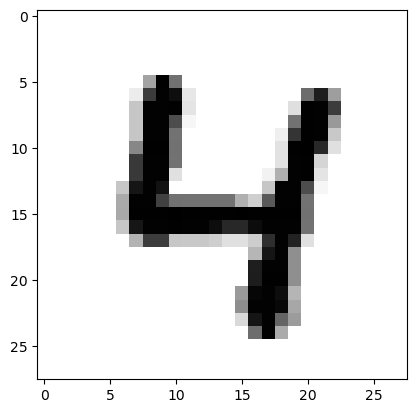

In [37]:
# Single value prediction in graph (plot)

# This will display the image corresponding to the 57th test sample from the MNIST dataset
plt.imshow(test_X[56].reshape(28,28), cmap = plt.cm.binary)
plt.show()